# Data Analytics

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob

### Download Data

In [2]:
!wget https://raw.githubusercontent.com/tezz-io/_data/master/amazon_vfl_reviews.csv

--2022-02-15 16:06:10--  https://raw.githubusercontent.com/tezz-io/_data/master/amazon_vfl_reviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 797308 (779K) [text/plain]
Saving to: ‘amazon_vfl_reviews.csv’

amazon_vfl_reviews. 100%[===================>] 778.62K   264KB/s    in 2.9s    

2022-02-15 16:06:14 (264 KB/s) - ‘amazon_vfl_reviews.csv’ saved [797308/797308]



### Load Data

In [3]:
data = pd.read_csv('amazon_vfl_reviews.csv')
data.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...


In [4]:
data.isnull().sum()
data.shape

(2782, 5)

In [5]:
data.dropna(inplace=True)
df = data.reset_index()
df.drop(['index'], axis=1, inplace=True)
df.shape

(2778, 5)

In [6]:
def get_brand(x):
    return x.split('-')[0]

df['brand'] = df['name'].apply(get_brand)
df['brand'].unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'PATANJALI', 'Dettol', 'Savlon', 'Cinthol', 'Britannia',
       'NutriChoice', 'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack',
       'Reflex', 'MYSORE', 'Mysore'], dtype=object)

In [7]:
df['brand'] = df['brand'].str.replace('PATANJALI', 'Patanjali')
df['brand'] = df['brand'].str.replace('MYSORE', 'Mysore')

In [8]:
# Number of unique brands
len(df['brand'].unique())

24

In [9]:
df1 = pd.DataFrame(df.groupby('brand')['asin'].count().reset_index())
df1.columns=['brand', 'count']
sort_df = df1.sort_values(['count'], ascending=True)

In [10]:
fig = px.bar(sort_df.iloc[:5, :], y='brand', x='count', orientation='h', color='count')
fig.update_layout(title_text='Top 5 brands with least number of reviews', title_x=0.5, template='plotly_dark')
fig.show()

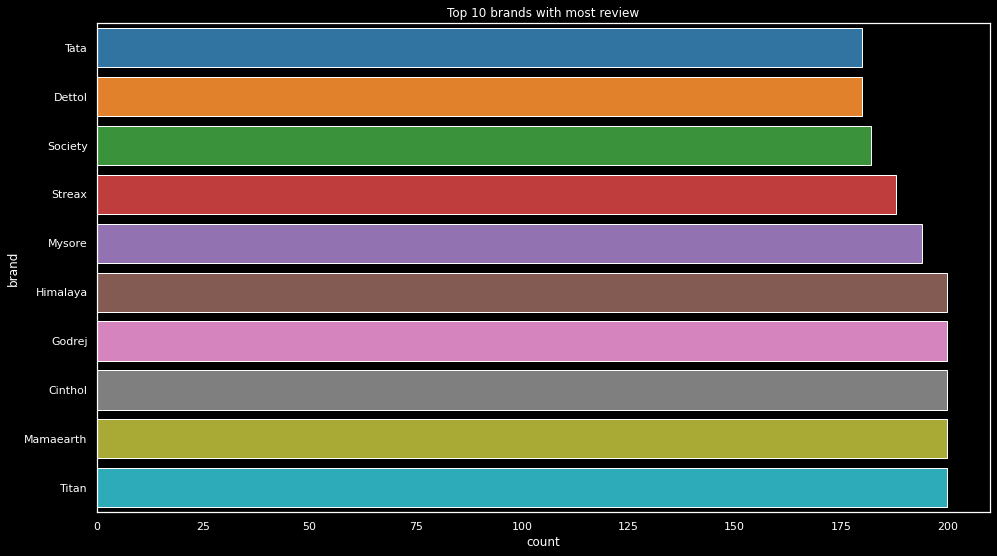

In [11]:
sns.set(rc={'figure.figsize':(16, 9)})
sns.set_theme(style='darkgrid')
plt.style.use('dark_background')
plt.title('Top 10 brands with most review')
sns.barplot(x=sort_df['count'].tail(10), y=sort_df['brand'].tail(10), palette='tab10').grid(False)

In [12]:
brand=sort_df.iloc[-10:, :]['brand'].to_list()
count=sort_df.iloc[-10:, :]['count'].to_list()

In [13]:
fig = go.Figure(data=[go.Table(header=dict(values=['Brand', 'Number of Reviews'], fill_color='lightblue', height=40), cells=dict(values=[brand, count], height=20))])
fig.update_layout(title_text='Top 5 Names of brands with most number of reviews', title_x=0.5, template='plotly_dark')
fig.show()

In [14]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/amrutheshwaro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
corpus = []
for i in range(len(df)):
    text = re.sub('[^a-zA-Z]', ' ', df['review'][i])
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    corpus.append(text)

In [16]:
word_cloud = WordCloud(width=800, height=600, colormap='RdYlGn', margin=0, max_words=200, max_font_size=120, background_color='black').generate(' '.join(corpus))

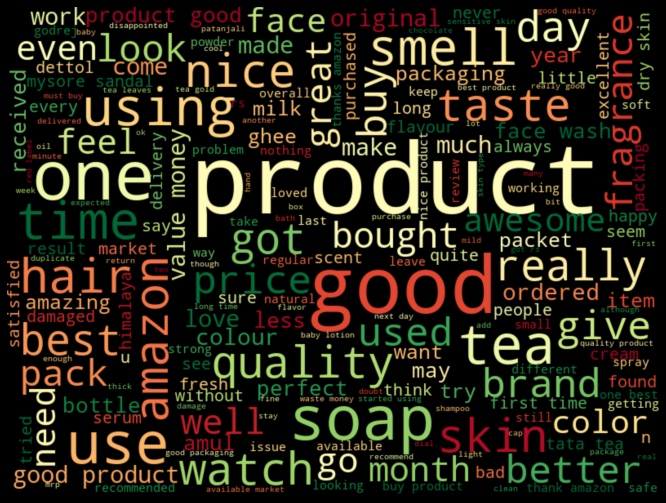

In [17]:
plt.figure(figsize=(16, 9))
plt.imshow(word_cloud, interpolation='gaussian')
plt.axis('off')
plt.show()

In [18]:
rating = pd.DataFrame(df['rating'].value_counts().reset_index())
rating.columns = ['rating', 'count']
rating.sort_values('rating', ascending=False, inplace=True)
rating

,rating,count
0,5,1444
2,4,460
3,3,198
4,2,130
1,1,546


In [19]:
fig = px.bar(rating, x='rating', y='count')
fig.update_layout(title_text='Distribution of ratings', title_x=0.5, template='plotly_dark')
fig.show()

In [20]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [21]:
df['polarity_score'] = df['review'].apply(lambda x: polarity(x))

In [22]:
def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'

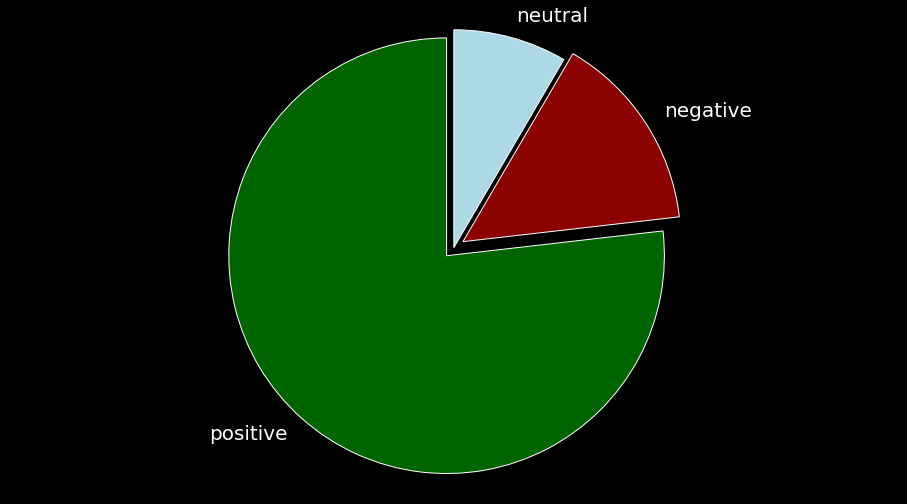

In [23]:
df['polarity'] = df['polarity_score'].map(lambda x: sentiment(x))
values = df['polarity'].value_counts()
labels = df['polarity'].value_counts().index
plt.pie(values, labels=labels, explode=(0.05, 0.05, 0), colors=['#006400', '#8B0000', '#ADD8E6'], startangle=90, textprops={'fontsize': 20})
plt.axis('equal')
plt.show()